## Andrew Hogue (amh3ze)

## DS5001 Final Project

### Data Source

https://kavita-ganesan.com/entity-ranking-data/#.XxtCdcfQh3g

### Import necessary packages

In [1]:
import os
import pandas as pd
import numpy as np
import nltk
import re
from nltk.tokenize import word_tokenize
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
import seaborn as sns
import plotly_express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from nltk.stem.porter import PorterStemmer

### Create dataframe and pull in reviews

In [231]:
data = pd.DataFrame(columns = ['Year', 'Make', 'Model', 'Review'])

In [234]:
for folder in os.listdir(file_dir):
    for fil in os.listdir(file_dir+folder):
        f = open(str(file_dir) + str(folder) + "/" + str(fil), 'r')
        read = f.read()
        if fil == '2007_toyota_camry':
            text=read.split('\n')
            text = list(filter(None, text))
        elif fil == '2008_honda_accord':
            text=read.split('\n')
            text = list(filter(None, text))
            regex = re.compile(r"^\w{1,}")
            filtered = filter(lambda x: regex.search(x), text)
            text = list(filtered)
        else:    
            doc = re.findall(r"<DOCNO>(.*?)</DOCNO>", read)
            text = re.findall(r"<TEXT>(.*?)</TEXT>", read)
        make = str(fil).split('_')[1]
        if len(fil.split('_')) == 3:
            model = str(fil).split('_')[2].strip("']")
        else:
            model = str(fil).split('_')[2:]
            model = ' '.join(model)
        data = data.append({'Year':folder, 'Make':make, 'Model':model,'Review':text}, ignore_index=True)

In [235]:
data.append({'Year':folder, 'Make':make, 'Model':model,'Review':text}, ignore_index=True)

,Year,Make,Model,Review
0,2007,acura,mdx,[I just moved to Germany two months ago and bo...
1,2007,acura,rdx,"[I'm a sales rep and drive approximately 40,00..."
2,2007,acura,rl,"[Had for 1 year, 14,000 miles. Excellent fuel ..."
3,2007,acura,tl,[I really love my Acura TL-Type S. The fit and...
4,2007,acura,tsx,[The TSX is really a very solid car. I was ple...
...,...,...,...,...
594,2009,volkswagen,rabbit,[In my family we own an 09 Rabbit and 08 Mazda...
595,2009,volkswagen,routan,"[I have to say, when considering our first min..."
596,2009,volkswagen,tiguan,"[After researching what kind of SUV I wanted, ..."
597,2009,volvo,c70,[Purchased my black C70 in August. My initial ...


In [238]:
for i in range(0, len(data.Review)):
    data.Review[i] = ' '.join(data.Review[i])

In [240]:
data.to_csv('all_reviews.csv')

In [ ]:
data = data.explode('Review')

In [ ]:
#data.to_csv('E:/Creative Cloud Files/DS5001/Project/car_reviews.csv')

In [38]:
data = pd.read_csv('car_reviews.csv')

In [42]:
data = data.drop(['Unnamed: 0'], axis=1)

In [43]:
data

,Year,Make,Model,Review
0,2007,acura,mdx,I just moved to Germany two months ago and bou...
1,2007,acura,mdx,After months of careful research and test driv...
2,2007,acura,mdx,I'm two years into a three year lease and I lo...
3,2007,acura,mdx,First luxury crossover SUV I have owned. MDX w...
4,2007,acura,mdx,This is the first Japanese SUV we have had in ...
...,...,...,...,...
42814,2009,volvo,c70,"As a VW driver for years, I talked myself out ..."
42815,2009,volvo,c70,The C70 handles beautiful and is fun to drive....
42816,2009,volvo,c70,Excellent exterior and interior styling; inte...
42817,2009,volvo,c70,Smooth handling and head-turning style go hand...


In [ ]:
bools = data['Review'].isna()
bools.where(bools == True)

In [13]:
OHCO = ['Year', 'Make', 'Model']

In [48]:
def tokenize_review(rev):
    rev = rev.lower()
    tokenizer = RegexpTokenizer(r'\w+')
    tokens = tokenizer.tokenize(rev)
    filtered_words = [w for w in tokens if not w in set(stopwords.words('english'))]
    #return " ".join(filtered_words)
    return filtered_words

In [7]:
tokenizer = RegexpTokenizer(r'\w+')
tokens = tokenizer.tokenize(data['Review'][0].lower())

In [ ]:
tokens

In [ ]:
#data['Review'][0].lower()

In [49]:
revtok = []
for item in data['Review']:
    revtok.append(tokenize_review(item))  

In [50]:
data['term_str'] = revtok

In [11]:
data['Make'].value_counts()

toyota           5260
honda            4576
nissan           2999
chevrolet        2864
ford             2775
hyundai          2501
mazda            1819
dodge            1681
volkswagen       1675
mercedes-benz    1592
acura            1269
jeep             1188
saturn           1168
bmw              1113
pontiac          1084
subaru           1015
lexus             935
infiniti          840
gmc               831
chrysler          751
scion             699
kia               698
audi              637
mitsubishi        636
cadillac          508
buick             504
suzuki            421
volvo             401
mini              196
smart             183
Name: Make, dtype: int64

In [12]:
make_year_counts = pd.DataFrame(data.groupby(['Year', 'Make']).size())

In [13]:
make_year_counts

0
Year Make            
2007 acura        564
     audi         284
     bmw          515
     buick        171
     cadillac     228
...               ...
2009 subaru       338
     suzuki        29
     toyota      1047
     volkswagen   496
     volvo         16

[89 rows x 1 columns]

In [14]:
data2 = data.explode('term_str')

In [15]:
data2.set_index(OHCO)

index  Unnamed: 0  \
Year Make  Model                      
2007 acura mdx        0           0   
           mdx        0           0   
           mdx        0           0   
           mdx        0           0   
           mdx        0           0   
...                 ...         ...   
2009 volvo c70    42818         597   
           c70    42818         597   
           c70    42818         597   
           c70    42818         597   
           c70    42818         597   

                                                             Review   term_str  
Year Make  Model                                                                
2007 acura mdx    I just moved to Germany two months ago and bou...      moved  
           mdx    I just moved to Germany two months ago and bou...    germany  
           mdx    I just moved to Germany two months ago and bou...        two  
           mdx    I just moved to Germany two months ago and bou...     months  
           mdx    I just moved to Germany two months ago and bou...        ago  
...                                                             ...        ...  
2009 volvo c70    Smooth as silk when shifting this manual 6 spe...      still  
           c70    Smooth as silk when shifting this manual 6 spe...     allows  
           c70    Smooth as silk when shifting this manual 6 spe...  excellent  
           c70    Smooth as silk when shifting this manual 6 spe...    storage  
           c70    Smooth as silk when shifting this manual 6 spe...       boot  

[2021442 rows x 4 columns]

In [16]:
data.set_index(OHCO)

index  Unnamed: 0  \
Year Make  Model                      
2007 acura mdx        0           0   
           mdx        1           0   
           mdx        2           0   
           mdx        3           0   
           mdx        4           0   
...                 ...         ...   
2009 volvo c70    42814         597   
           c70    42815         597   
           c70    42816         597   
           c70    42817         597   
           c70    42818         597   

                                                             Review  \
Year Make  Model                                                      
2007 acura mdx    I just moved to Germany two months ago and bou...   
           mdx    After months of careful research and test driv...   
           mdx    I'm two years into a three year lease and I lo...   
           mdx    First luxury crossover SUV I have owned. MDX w...   
           mdx    This is the first Japanese SUV we have had in ...   
...                                                             ...   
2009 volvo c70    As a VW driver for years, I talked myself out ...   
           c70    The C70 handles beautiful and is fun to drive....   
           c70     Excellent exterior and interior styling; inte...   
           c70    Smooth handling and head-turning style go hand...   
           c70    Smooth as silk when shifting this manual 6 spe...   

                                                           term_str  
Year Make  Model                                                     
2007 acura mdx    [moved, germany, two, months, ago, bought, 07,...  
           mdx    [months, careful, research, test, drives, bmw,...  
           mdx    [two, years, three, year, lease, love, car, th...  
           mdx    [first, luxury, crossover, suv, owned, mdx, le...  
           mdx    [first, japanese, suv, last, suv, yukon, xl, e...  
...                                                             ...  
2009 volvo c70    [vw, driver, years, talked, another, vw, last,...  
           c70    [c70, handles, beautiful, fun, drive, surprise...  
           c70    [excellent, exterior, interior, styling, inter...  
           c70    [smooth, handling, head, turning, style, go, h...  
           c70    [smooth, silk, shifting, manual, 6, speed, exc...  

[42819 rows x 4 columns]

### Sentiment Analysis using VADER at sentence level

In [117]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
#nltk.download('vader_lexicon')

In [118]:
sia = SentimentIntensityAnalyzer()

In [19]:
sample = data['Review'][0]

In [20]:
sia.polarity_scores(sample)['compound']

0.9637

In [119]:
data['sentiment'] = data['Review'].apply(lambda x: sia.polarity_scores(x)['compound'])

In [22]:
data = data.drop('index', axis=1)

In [219]:
data.head()

,Year,Make,Model,Review,term_str,sentiment
0,2007,acura,mdx,I just moved to Germany two months ago and bou...,"[moved, germany, two, months, ago, bought, 07,...",0.9637
1,2007,acura,mdx,After months of careful research and test driv...,"[months, careful, research, test, drives, bmw,...",0.8362
2,2007,acura,mdx,I'm two years into a three year lease and I lo...,"[two, years, three, year, lease, love, car, th...",0.9764
3,2007,acura,mdx,First luxury crossover SUV I have owned. MDX w...,"[first, luxury, crossover, suv, owned, mdx, le...",0.9687
4,2007,acura,mdx,This is the first Japanese SUV we have had in ...,"[first, japanese, suv, last, suv, yukon, xl, e...",0.9116


In [121]:
data3 = pd.DataFrame(data.groupby(['Year', 'Make', 'Model']).sentiment.mean())

In [122]:
data3.head()

sentiment
Year Make  Model           
2007 acura mdx     0.714553
           rdx     0.620479
           rl      0.727059
           tl      0.736165
           tsx     0.762711

In [123]:
data3 = data3.reset_index()

In [124]:
data3.head()

,Year,Make,Model,sentiment
0,2007,acura,mdx,0.714553
1,2007,acura,rdx,0.620479
2,2007,acura,rl,0.727059
3,2007,acura,tl,0.736165
4,2007,acura,tsx,0.762711


In [125]:
data4 = pd.DataFrame(data.groupby(['Year', 'Make']).sentiment.mean()).reset_index()

In [126]:
data4.head()

,Year,Make,sentiment
0,2007,acura,0.698087
1,2007,audi,0.653201
2,2007,bmw,0.631952
3,2007,buick,0.507084
4,2007,cadillac,0.636593


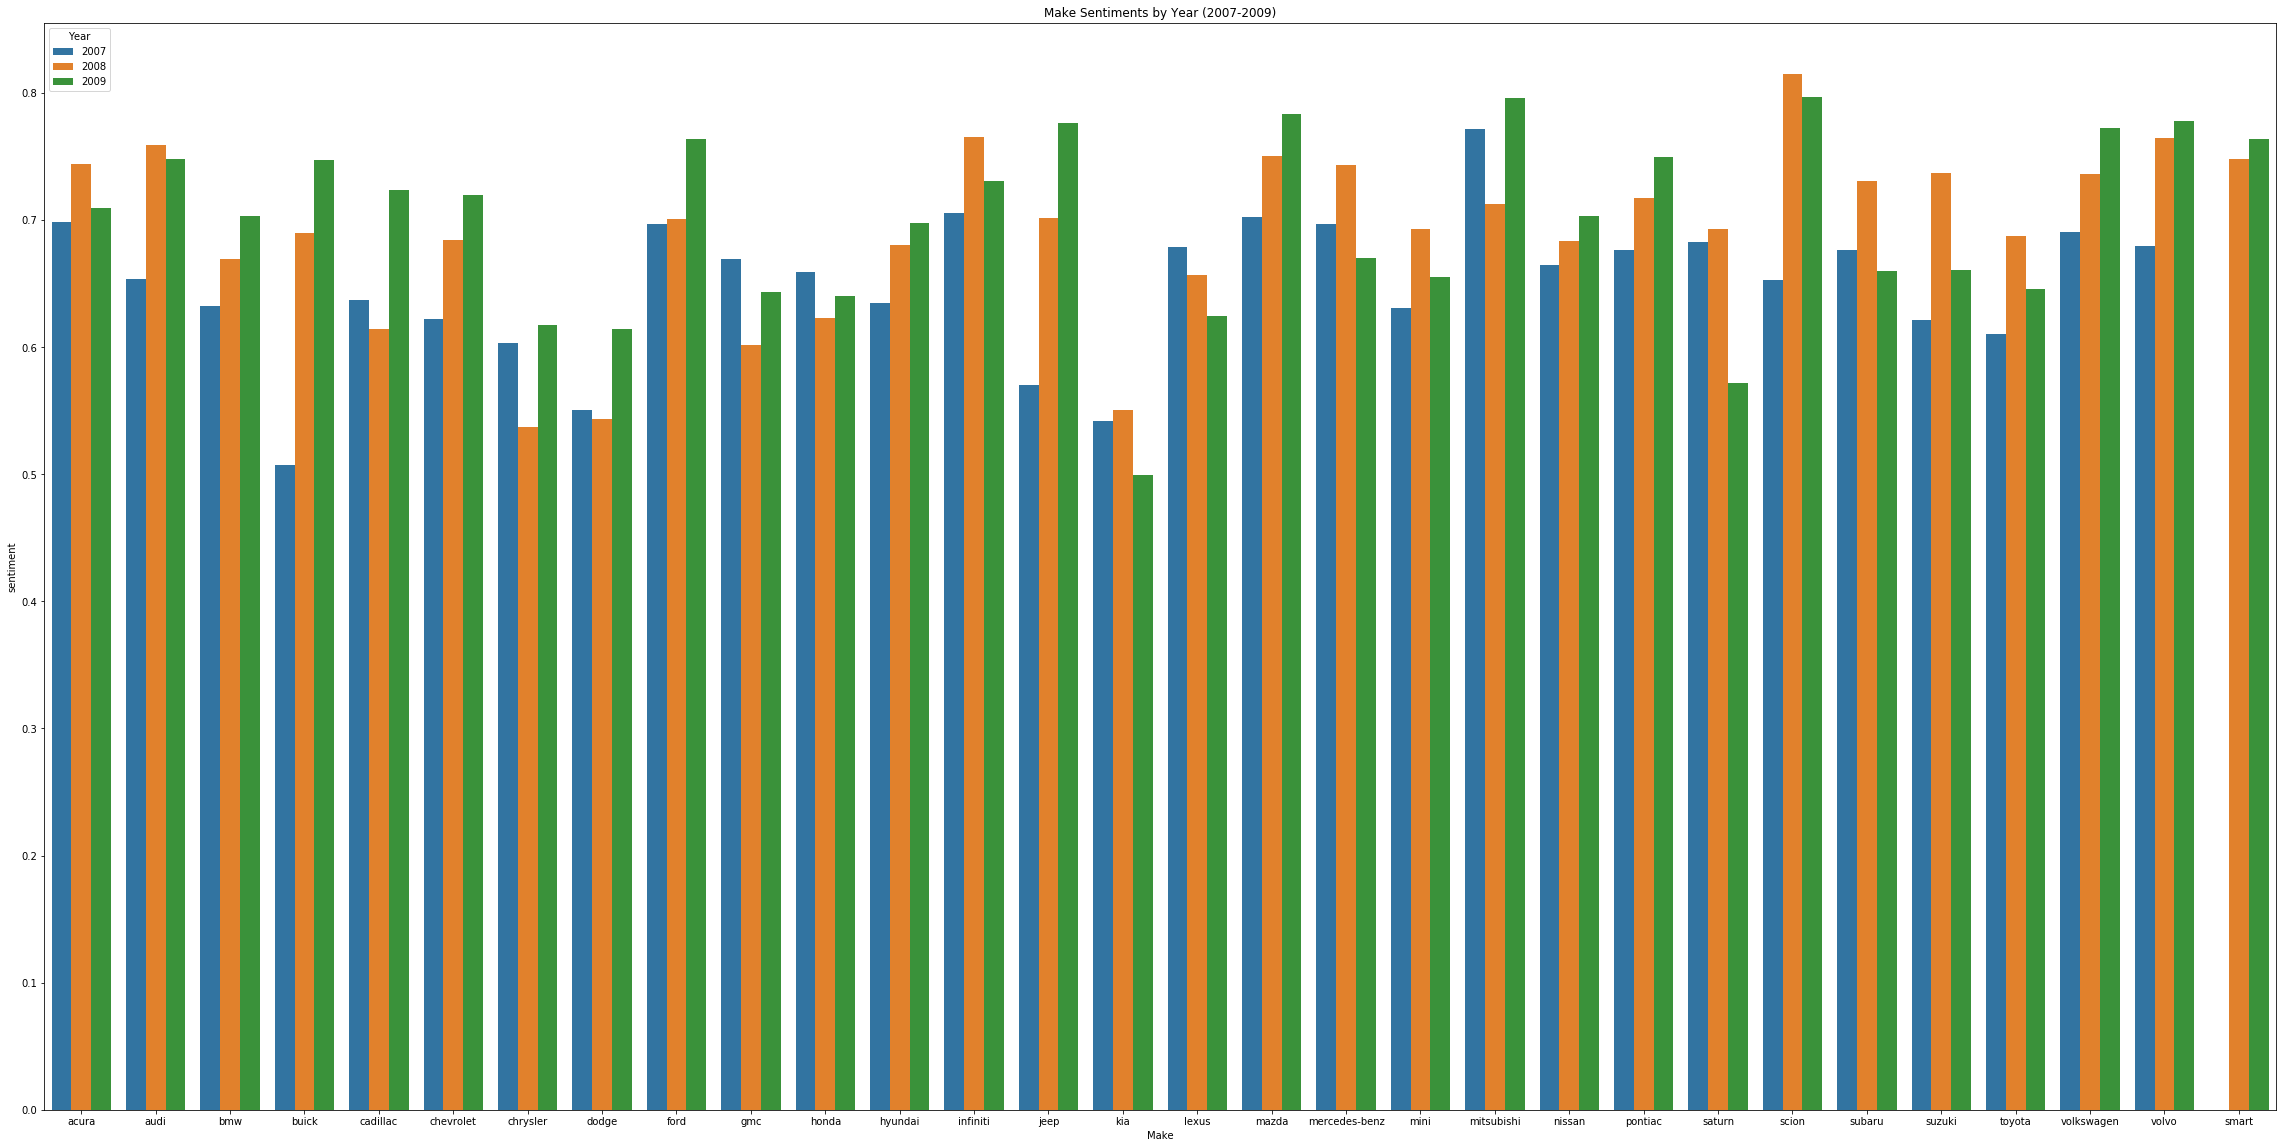

In [129]:
plt.figure(figsize=(40,20))
ax1 = sns.barplot(x='Make', y='sentiment', hue='Year', data = data4)
ax1.set_title('Make Sentiments by Year (2007-2009)')
plt.savefig('Make Sentiments by Year (2007-2009).png')

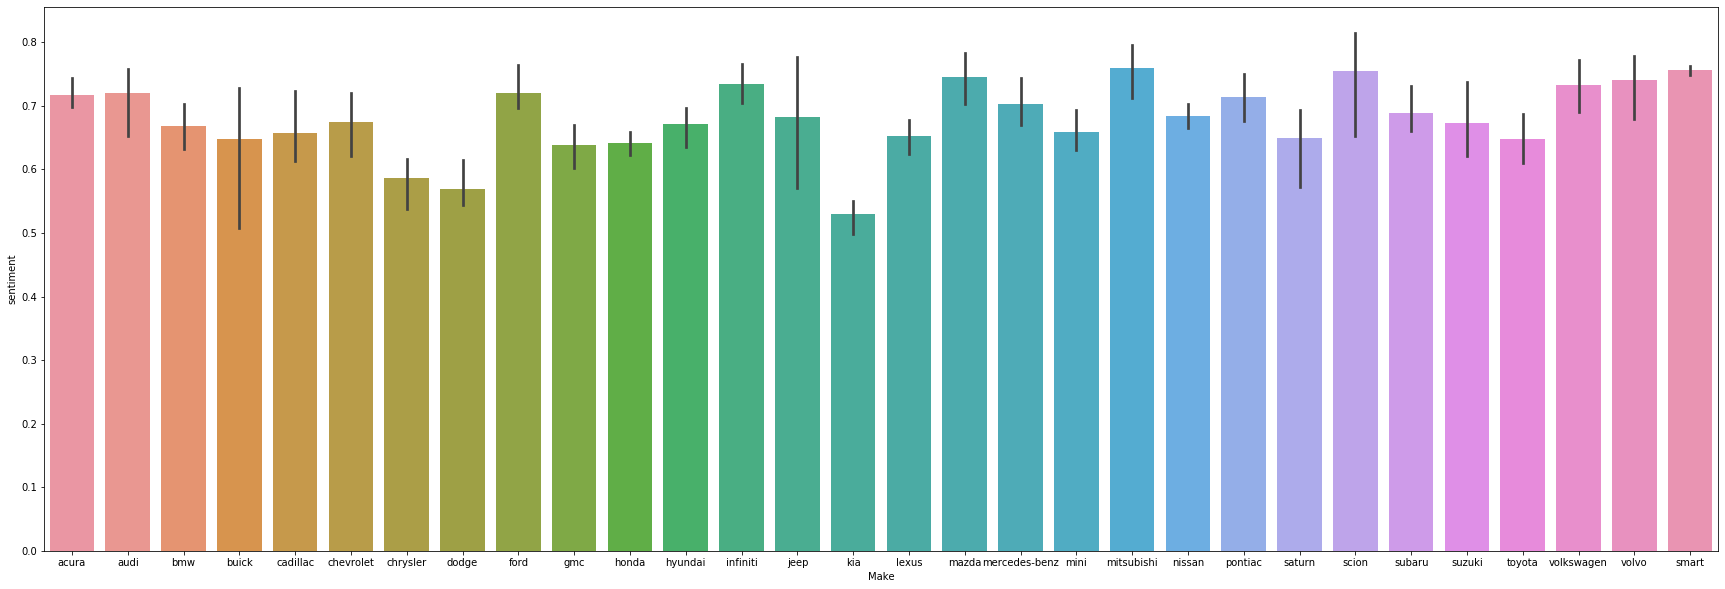

In [130]:
plt.figure(figsize=(30,10))
ax1 = sns.barplot(x='Make', y='sentiment', data = data4)
plt.savefig('Average Sentiment by Make')

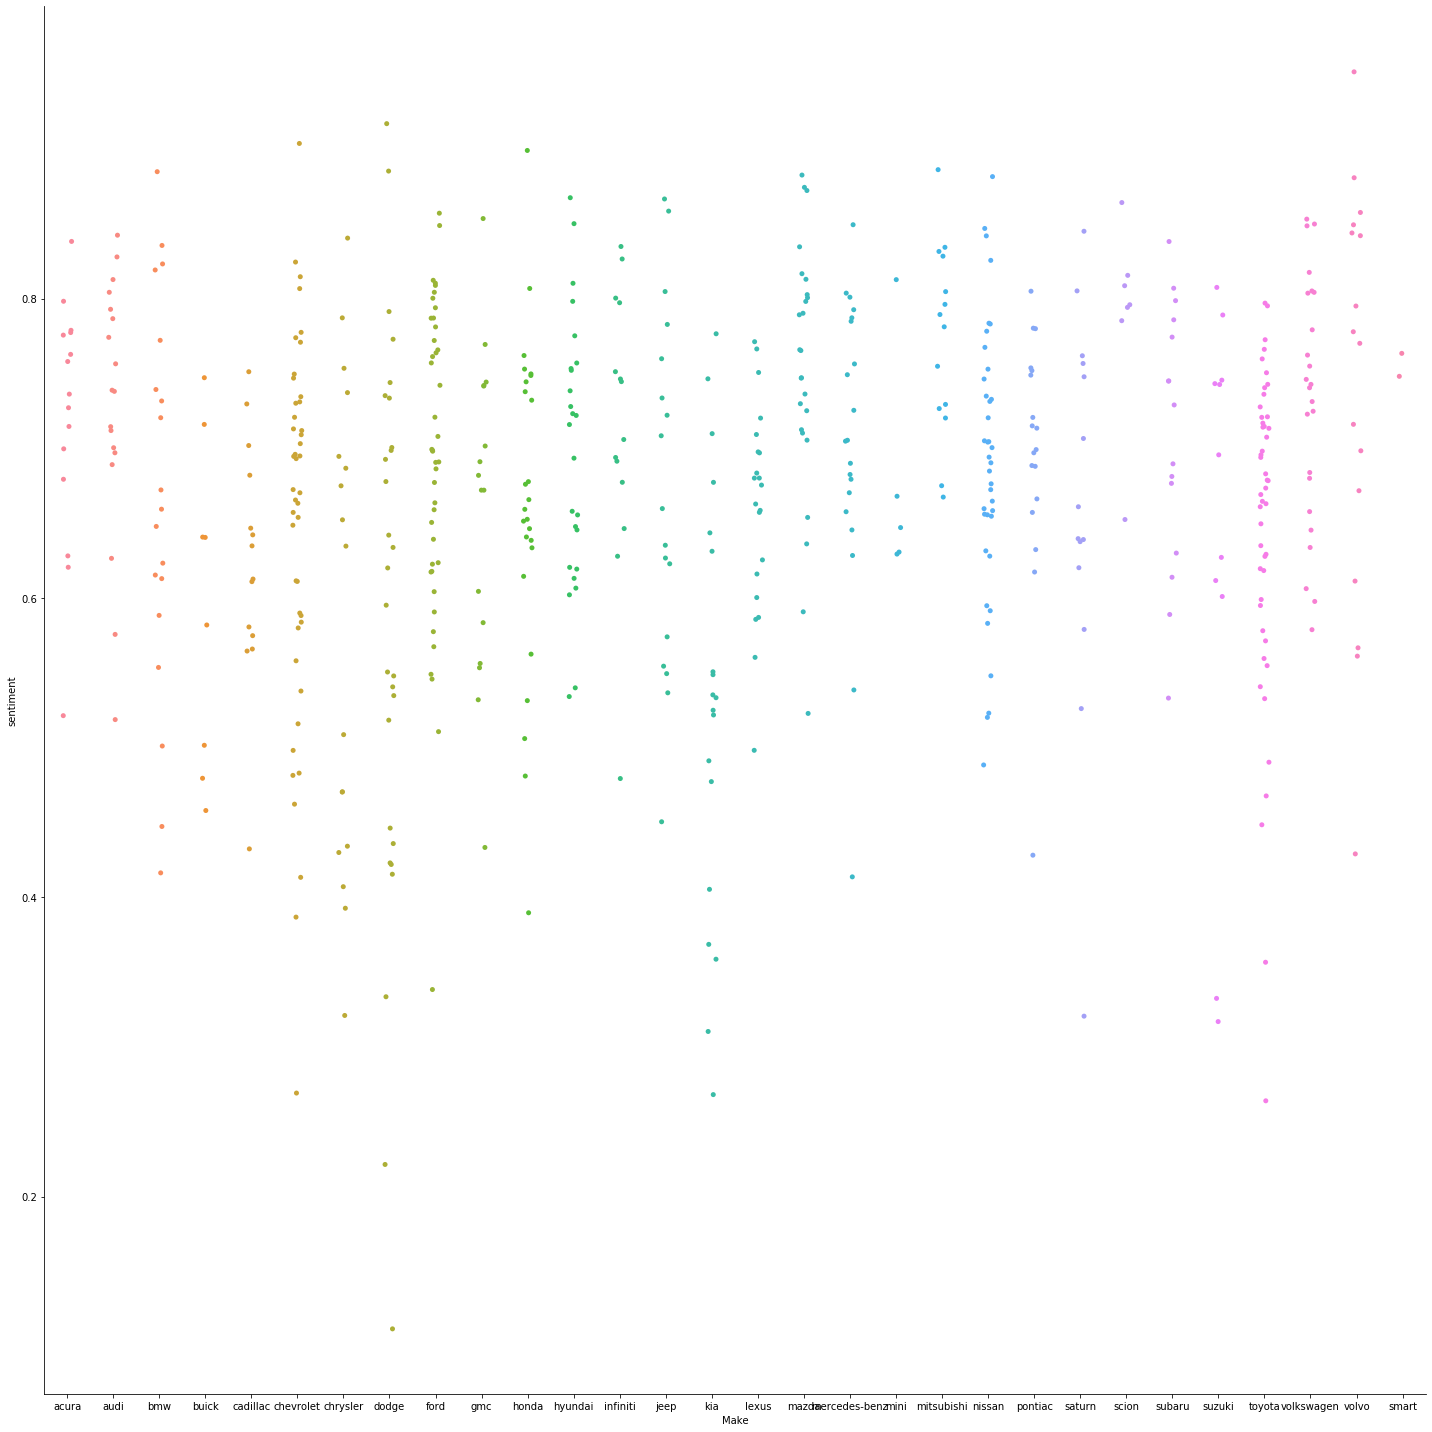

In [131]:
ax5 = sns.catplot(x='Make', y='sentiment', data=data3, height = 20)
ax5.set_titles('Sentiment Range by Make')
plt.savefig('sentiment_range_by_make.png')

In [33]:
os.chdir('E:/Creative Cloud Files/DS5001/Project/')
share = pd.read_csv('market_share.csv')

In [ ]:
def share_sent_plot(make): 
    fig = make_subplots(specs=[[{"secondary_y": True}]])

    fig.add_trace(
        go.Scatter(x=data4[data4.Make == str(make)].Year, y=data4[data4.Make == str(make)].sentiment, name="Sentiment"),
        secondary_y=False,
    )

    fig.add_trace(
        go.Scatter(x=share[share.Make == str(make)].Year, y=share[share.Make == str(make)].US_Share, name="US Share"),
        secondary_y=True,
    )

    fig.update_layout(
        title_text="Sentiment vs. Market Share by Year for " + str(make)
    )

    fig.update_xaxes(title_text="Year")

    fig.update_yaxes(title_text="Sentiment", secondary_y=False)
    fig.update_yaxes(title_text="US Market Share", secondary_y=True)
    
    fig.write_image("Share_Sent_{}.png".format(make))

In [ ]:
#for i in share.Make.unique():
#    share_sent_plot(i)

In [ ]:
share.Year = share.Year.astype('object')

In [ ]:
data2['pos_tuple'] = nltk.pos_tag(data2.term_str)

In [6]:
data2 = pd.read_csv('tokens.csv')

In [7]:
data2.head()

,Unnamed: 0,index,Year,Make,Model,Review,term_str,pos_tuple,pos
0,0,0,2007,acura,mdx,I just moved to Germany two months ago and bou...,moved,"('moved', 'VBN')",VBN
1,0,0,2007,acura,mdx,I just moved to Germany two months ago and bou...,germany,"('germany', 'JJ')",JJ
2,0,0,2007,acura,mdx,I just moved to Germany two months ago and bou...,two,"('two', 'CD')",CD
3,0,0,2007,acura,mdx,I just moved to Germany two months ago and bou...,months,"('months', 'NNS')",NNS
4,0,0,2007,acura,mdx,I just moved to Germany two months ago and bou...,ago,"('ago', 'RB')",RB


In [8]:
data2 = data2[~data2.term_str.isin(data2.Model)]

In [9]:
data2 = data2[~data2.term_str.isin(data2.Make)]

In [10]:
car_stopwords = ['car', 'truck', 'miles', 'ride', 'cars', 'vehicles']

In [11]:
data2 = data2[~data2.term_str.isin(car_stopwords)]

### Topic Models by Make

In [14]:
words = data2[data2.pos.str.match(r'^NNS?$')]\
    .groupby(OHCO[1]).term_str\
    .apply(lambda x: ' '.join(x))\
    .to_frame()\

In [15]:
words.head()

,term_str
Make,
acura,months member everything week suv faster mph r...
audi,fun luxury wagon week husband traffic highway ...
bmw,owners rfts experience rougher tire replacemen...
buick,problem dealer computer search cxs color optio...
cadillac,lease mileage appearance comfort engine planni...


In [34]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation as LDA

In [35]:
n_terms = 50
n_topics = 10
max_iter = 10

In [36]:
tfv = CountVectorizer(max_features=n_terms, stop_words='english')
tf = tfv.fit_transform(words.term_str)
TERMS = tfv.get_feature_names()

In [37]:
lda = LDA(n_components=n_topics, max_iter=max_iter, learning_offset=50., random_state=0)

In [38]:
THETA = pd.DataFrame(lda.fit_transform(tf), index=words.index)
THETA.columns.name = 'topic_id'

In [39]:
THETA.sample(20).style.background_gradient()

topic_id,0,1,2,3,4,5,6,7,8,9
Make,,,,,,,,,,
mitsubishi,0.173674,0.048743,0.169487,0.102936,0.030695,0.081392,0.004818,0.336239,0.051530,0.000485
buick,0.213551,0.000040,0.014028,0.054982,0.046869,0.000040,0.410168,0.000040,0.236540,0.023743
gmc,0.191034,0.009243,0.004344,0.000827,0.028979,0.000022,0.718767,0.000022,0.024471,0.022291
toyota,0.023577,0.198274,0.025064,0.022451,0.025001,0.065676,0.274153,0.008114,0.018289,0.339403
bmw,0.000020,0.001950,0.078552,0.000020,0.727915,0.135955,0.000020,0.052814,0.002735,0.000020
audi,0.008582,0.032540,0.025660,0.007210,0.592298,0.097386,0.004215,0.178536,0.015324,0.038250
pontiac,0.005554,0.104087,0.019076,0.099659,0.037958,0.434771,0.013726,0.090238,0.129248,0.065683
chevrolet,0.085066,0.189731,0.023425,0.133341,0.023396,0.053794,0.198545,0.016843,0.152563,0.123299
ford,0.068643,0.243946,0.037490,0.067857,0.047171,0.078609,0.216239,0.042967,0.061429,0.135650


In [40]:
PHI = pd.DataFrame(lda.components_, columns=TERMS)
PHI.index.name = 'topic_id'
PHI.columns.name  = 'term_str'

In [41]:
PHI.T.head().style.background_gradient()

topic_id,0,1,2,3,4,5,6,7,8,9
term_str,,,,,,,,,,
city,293.105751,324.320012,185.469485,387.265576,136.760408,341.998527,560.114769,241.856791,154.575215,1276.533464
comfort,215.500620,227.267975,392.403683,161.288296,495.833033,124.142492,553.582026,139.592953,182.443748,458.945174
day,238.719663,250.694886,118.254509,243.400160,208.858692,358.388657,267.210259,196.860802,179.072624,425.539747
dealer,297.234287,198.878057,183.908653,389.820753,328.568983,359.762770,351.714168,217.184804,339.805340,517.122185
design,139.766112,196.178125,177.804797,220.567410,354.106387,169.015070,297.875372,232.092603,166.143201,652.450923


In [42]:
TOPICS = PHI.stack().to_frame().rename(columns={0:'weight'})\
    .groupby('topic_id')\
    .apply(lambda x: 
           x.weight.sort_values(ascending=False)\
               .head(10)\
               .reset_index()\
               .drop('topic_id',1)\
               .term_str)

In [43]:
TOPICS

term_str,0,1,2,3,4,5,6,7,8,9
topic_id,,,,,,,,,,
0,vehicle,drive,gas,suv,mileage,price,power,road,engine,love
1,mileage,gas,drive,mpg,power,vehicle,engine,road,fun,highway
2,drive,vehicle,power,package,performance,gas,mileage,seats,love,features
3,price,gas,mileage,drive,vehicle,mpg,features,room,power,engine
4,drive,performance,power,vehicle,quality,engine,seats,road,time,fun
5,drive,gas,fun,power,mileage,love,engine,time,room,road
6,vehicle,gas,mileage,mpg,power,room,drive,seats,engine,road
7,drive,fun,price,engine,gas,features,mileage,test,mpg,performance
8,vehicle,mileage,seats,power,engine,drive,problems,gas,time,love


In [44]:
TOPICS['label'] = TOPICS.apply(lambda x: str(x.name) + ' ' + ' '.join(x), 1)

In [45]:
TOPICS['doc_weight_sum'] = THETA.sum()

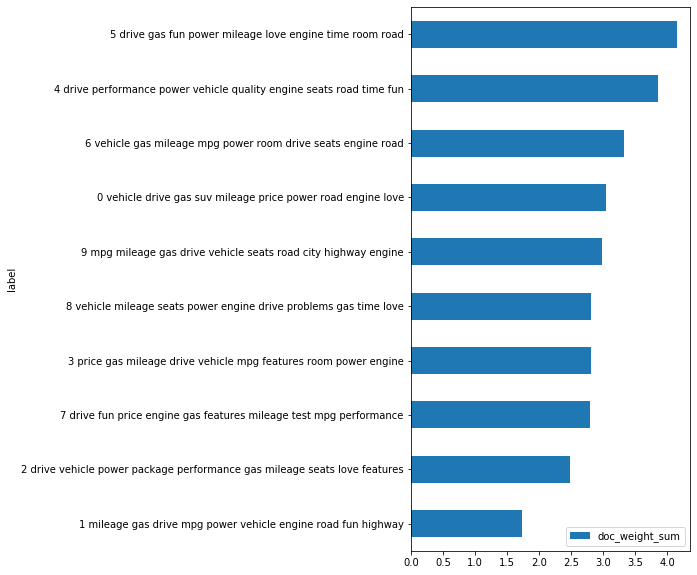

In [46]:
TOPICS.sort_values('doc_weight_sum', ascending=True).plot.barh(y='doc_weight_sum', x='label', figsize=(5,10)) 

In [47]:
topic_cols = [t for t in range(n_topics)]
MAKES = THETA.groupby('Make')[topic_cols].mean().T                                            
MAKES.index.name = 'topic_id'

In [48]:
MAKES.T

topic_id,0,1,2,3,4,5,6,7,8,9
Make,,,,,,,,,,
acura,0.150107,0.041409,0.371315,0.057842,0.076429,0.011205,0.021958,0.184927,0.010804,0.074003
audi,0.008582,0.032540,0.025660,0.007210,0.592298,0.097386,0.004215,0.178536,0.015324,0.038250
bmw,0.000020,0.001950,0.078552,0.000020,0.727915,0.135955,0.000020,0.052814,0.002735,0.000020
buick,0.213551,0.000040,0.014028,0.054982,0.046869,0.000040,0.410168,0.000040,0.236540,0.023743
cadillac,0.306251,0.000046,0.104976,0.000046,0.437659,0.000046,0.001695,0.000046,0.148579,0.000654
chevrolet,0.085066,0.189731,0.023425,0.133341,0.023396,0.053794,0.198545,0.016843,0.152563,0.123299
chrysler,0.106616,0.020451,0.029989,0.067422,0.009458,0.022589,0.201570,0.005375,0.510168,0.026362
dodge,0.058620,0.041728,0.011624,0.048122,0.020215,0.265235,0.151661,0.002975,0.371768,0.028051
ford,0.068643,0.243946,0.037490,0.067857,0.047171,0.078609,0.216239,0.042967,0.061429,0.135650


In [49]:
MAKES['topterms'] = TOPICS[[i for i in range(10)]].apply(lambda x: ' '.join(x), 1)

In [51]:
MAKES.sort_values('acura', ascending=False).style.background_gradient()

Make,acura,audi,bmw,buick,cadillac,chevrolet,chrysler,dodge,ford,gmc,honda,hyundai,infiniti,jeep,kia,lexus,mazda,mercedes-benz,mini,mitsubishi,nissan,pontiac,saturn,scion,smart,subaru,suzuki,toyota,volkswagen,volvo,topterms
topic_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2,0.371315,0.025660,0.078552,0.014028,0.104976,0.023425,0.029989,0.011624,0.037490,0.004344,0.004679,0.114587,0.501810,0.008636,0.032037,0.441474,0.031191,0.175312,0.000090,0.169487,0.166394,0.019076,0.010467,0.000026,0.000110,0.023838,0.000045,0.025064,0.017616,0.045114,drive vehicle power package performance gas mileage seats love features
7,0.184927,0.178536,0.052814,0.000040,0.000046,0.016843,0.005375,0.002975,0.042967,0.000022,0.031680,0.061700,0.251611,0.001087,0.057811,0.012658,0.404579,0.006268,0.124933,0.336239,0.058269,0.090238,0.083313,0.176558,0.010720,0.139097,0.071518,0.008114,0.323787,0.066788,drive fun price engine gas features mileage test mpg performance
0,0.150107,0.008582,0.000020,0.213551,0.306251,0.085066,0.106616,0.058620,0.068643,0.191034,0.025276,0.118903,0.004239,0.358544,0.169152,0.011392,0.095651,0.084074,0.000090,0.173674,0.021013,0.005554,0.233396,0.001931,0.000110,0.063611,0.396041,0.023577,0.003437,0.064085,vehicle drive gas suv mileage price power road engine love
4,0.076429,0.592298,0.727915,0.046869,0.437659,0.023396,0.009458,0.020215,0.047171,0.028979,0.007952,0.022352,0.180333,0.013467,0.004357,0.176165,0.072764,0.530690,0.000090,0.030695,0.030925,0.037958,0.060720,0.000026,0.000110,0.191580,0.000045,0.025001,0.150950,0.308012,drive performance power vehicle quality engine seats road time fun
9,0.074003,0.038250,0.000020,0.023743,0.000654,0.123299,0.026362,0.028051,0.135650,0.022291,0.656583,0.071655,0.000025,0.044751,0.044468,0.215972,0.062914,0.005048,0.092340,0.000485,0.181273,0.065683,0.066302,0.077227,0.000110,0.319744,0.023392,0.339403,0.068788,0.179415,mpg mileage gas drive vehicle seats road city highway engine
3,0.057842,0.007210,0.000020,0.054982,0.000046,0.133341,0.067422,0.048122,0.067857,0.000827,0.071254,0.474892,0.014278,0.001098,0.362310,0.027166,0.028299,0.006819,0.000090,0.102936,0.152901,0.099659,0.090222,0.493286,0.000110,0.031583,0.277751,0.022451,0.086386,0.026588,price gas mileage drive vehicle mpg features room power engine
1,0.041409,0.032540,0.001950,0.000040,0.000046,0.189731,0.020451,0.041728,0.243946,0.009243,0.048039,0.016895,0.007593,0.073744,0.047943,0.003680,0.099242,0.021726,0.023282,0.048743,0.140480,0.104087,0.084016,0.045306,0.000110,0.071394,0.041127,0.198274,0.045202,0.032281,mileage gas drive mpg power vehicle engine road fun highway
6,0.021958,0.004215,0.000020,0.410168,0.001695,0.198545,0.201570,0.151661,0.216239,0.718767,0.062771,0.064828,0.000025,0.233050,0.210492,0.016915,0.045546,0.075369,0.000090,0.004818,0.117918,0.013726,0.049502,0.007530,0.000110,0.064780,0.061461,0.274153,0.011768,0.089102,vehicle gas mileage mpg power room drive seats engine road
5,0.011205,0.097386,0.135955,0.000040,0.000046,0.053794,0.022589,0.265235,0.078609,0.000022,0.042348,0.003725,0.039952,0.144046,0.004252,0.003126,0.079301,0.021087,0.758904,0.081392,0.104772,0.434771,0.143935,0.189756,0.988397,0.037634,0.073300,0.065676,0.258024,0.007381,drive gas fun power mileage love engine time room road


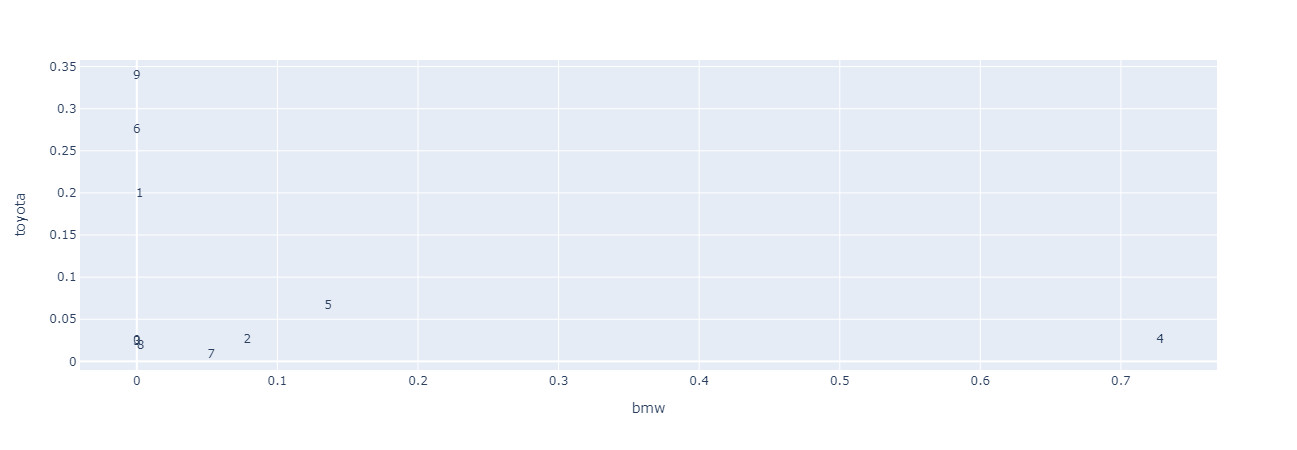

In [53]:
px.scatter(MAKES.reset_index(), 'bmw', 'toyota', hover_name='topterms', text='topic_id')\
    .update_traces(mode='text')

### TFIDF

In [195]:
data2 = pd.read_csv('tokens.csv').set_index(OHCO[1:3]).drop(['Unnamed: 0', 'index', 'Review', 'Year'], axis=1)

In [196]:
data2.head()

term_str          pos_tuple  pos
Make  Model                                 
acura mdx      moved   ('moved', 'VBN')  VBN
      mdx    germany  ('germany', 'JJ')   JJ
      mdx        two      ('two', 'CD')   CD
      mdx     months  ('months', 'NNS')  NNS
      mdx        ago      ('ago', 'RB')   RB

In [241]:
data5 = pd.read_csv('all_reviews.csv')

In [242]:
data5.head()

,Unnamed: 0,Year,Make,Model,Review
0,0,2007,acura,mdx,I just moved to Germany two months ago and bou...
1,1,2007,acura,rdx,"I'm a sales rep and drive approximately 40,000..."
2,2,2007,acura,rl,"Had for 1 year, 14,000 miles. Excellent fuel e..."
3,3,2007,acura,tl,I really love my Acura TL-Type S. The fit and ...
4,4,2007,acura,tsx,The TSX is really a very solid car. I was plea...


In [259]:
revtok = []
for item in data5['Review']:
    revtok.append(tokenize_review(item))  

In [260]:
data5['term_str'] = revtok

In [261]:
data5.head()

,Unnamed: 0,Year,Make,Model,Review,term_str
0,0,2007,acura,mdx,I just moved to Germany two months ago and bou...,"[moved, germany, two, months, ago, bought, 07,..."
1,1,2007,acura,rdx,"I'm a sales rep and drive approximately 40,000...","[sales, rep, drive, approximately, 40, 000, 45..."
2,2,2007,acura,rl,"Had for 1 year, 14,000 miles. Excellent fuel e...","[1, year, 14, 000, miles, excellent, fuel, eco..."
3,3,2007,acura,tl,I really love my Acura TL-Type S. The fit and ...,"[really, love, acura, tl, type, fit, finish, c..."
4,4,2007,acura,tsx,The TSX is really a very solid car. I was plea...,"[tsx, really, solid, car, pleased, purchased, ..."


In [264]:
data5 = data5.sort_values('Make')

In [267]:
data5.to_csv('TERMS.csv')

In [349]:
data6 = data5.set_index('Make').drop(['Model', 'Year', 'Review', 'Unnamed: 0'], 1).explode('term_str')

In [350]:
data6 = data6[~data6.term_str.isin(data.Make)]

In [351]:
data6 = data6[~data6.term_str.isin(data.Model)]

In [353]:
data6 = data6[~data6.term_str.str.contains('\d', regex=True)]

In [354]:
data6

,term_str
Make,
acura,moved
acura,germany
acura,two
acura,months
acura,ago
...,...
volvo,still
volvo,allows
volvo,excellent


In [355]:
BOW = data6.groupby(OHCO[1:2]+['term_str']).term_str.count()\
    .to_frame().rename(columns={'term_str':'n'})

In [356]:
BOW.head()

n
Make  term_str     
acura _           1
      abatement   1
      aberdeen    1
      ability     7
      able       19

In [357]:
DTCM = BOW['n'].unstack().fillna(0).astype('int')
DTCM.head()

term_str,_,______,_that_,aa,aaa,aaaaahhhh,aaahhhh,aagain,aah,aahhhed,...,ztt,ztw,zune,zx,zxi,zzzz,zzzzzzzrrrrrr,zzzzzzzzzzzzzzz,½,¾
Make,,,,,,,,,,,,,,,,,,,,,
acura,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
audi,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
bmw,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
buick,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
cadillac,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [358]:
tf_method = 'sum'

In [359]:
if tf_method == 'sum':
    TF = DTCM.T / DTCM.T.sum()
elif tf_method == 'max':
    TF = DTCM.T / DTCM.T.max()
elif tf_method == 'log':
    TF = np.log10(1 + DTCM.T)
elif tf_method == 'raw':
    TF = DTCM.T
elif tf_method == 'double_norm':
    TF = DTCM.T / DTCM.T.max()
    TF = tf_norm_k + (1 - tf_norm_k) * TF[TF > 0]
elif tf_method == 'binary':
    TF = DTCM.T.astype('bool').astype('int')
TF = TF.T

In [360]:
TF.head()

term_str,_,______,_that_,aa,aaa,aaaaahhhh,aaahhhh,aagain,aah,aahhhed,...,ztt,ztw,zune,zx,zxi,zzzz,zzzzzzzrrrrrr,zzzzzzzzzzzzzzz,½,¾
Make,,,,,,,,,,,,,,,,,,,,,
acura,0.000019,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
audi,0.000000,0.0,0.0,0.0,0.000036,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
bmw,0.000000,0.0,0.0,0.0,0.000022,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
buick,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
cadillac,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000049,0.0,0.0,0.0,0.0,0.0,0.0


In [361]:
DF = DTCM[DTCM > 0].count()

In [362]:
DF.head()

term_str
_         2
______    1
_that_    1
aa        1
aaa       9
dtype: int64

In [363]:
N = DTCM.shape[0]

In [364]:
idf_method = 'standard'

In [365]:
if idf_method == 'standard':
    IDF = np.log10(N / DF)
elif idf_method == 'max':
    IDF = np.log10(DF.max() / DF) 
elif idf_method == 'smooth':
    IDF = np.log10((1 + N) / (1 + DF)) + 1

In [366]:
TFIDF = TF * IDF

In [367]:
TFIDF.head(30)

term_str,_,______,_that_,aa,aaa,aaaaahhhh,aaahhhh,aagain,aah,aahhhed,...,ztt,ztw,zune,zx,zxi,zzzz,zzzzzzzrrrrrr,zzzzzzzzzzzzzzz,½,¾
Make,,,,,,,,,,,,,,,,,,,,,
acura,0.000022,0.000000,0.00000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.00000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
audi,0.000000,0.000000,0.00000,0.000000,0.000019,0.00000,0.00000,0.000000,0.000000,0.00000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
bmw,0.000000,0.000000,0.00000,0.000000,0.000011,0.00000,0.00000,0.000000,0.000000,0.00000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
buick,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.00000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
cadillac,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.00000,...,0.000000,0.00000,0.000000,0.000049,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
chevrolet,0.000010,0.000000,0.00000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.00000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
chrysler,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.00000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
dodge,0.000000,0.000021,0.00000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.00000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000021
ford,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,0.00000,0.000013,0.000000,0.00000,...,0.000000,0.00000,0.000025,0.000017,0.000000,0.000000,0.000000,0.000000,0.000020,0.000000


In [368]:
TFIDF.to_csv('TFIDF.csv')

In [369]:
TFIDF.max()

term_str
_                  0.000022
______             0.000021
_that_             0.000020
aa                 0.000034
aaa                0.000019
                     ...   
zzzz               0.000012
zzzzzzzrrrrrr      0.000008
zzzzzzzzzzzzzzz    0.000012
½                  0.000020
¾                  0.000021
Length: 27923, dtype: float64

In [307]:
data6['df'] = DF
data6['idf'] = IDF
data6['tfidf_mean'] = TFIDF[TFIDF > 0].mean().fillna(0)
data6['tfidf_sum'] = TFIDF.sum()
data6['tfidf_median'] = TFIDF[TFIDF > 0].median().fillna(0)
data6['tfidf_max'] = TFIDF.max()

In [370]:
BOW['tf'] = TF.stack()
BOW['tfidf'] = TFIDF.stack()

In [388]:
BOW.to_csv('BOW_w_TFIDF.csv')

In [374]:
def tfidf_make(make):
    
    table = BOW.loc[str(make)].sort_values('tfidf', ascending=False)
    
    tops = table.head(100)

    tops.to_csv('tfidf_{}.csv'.format(make))

In [375]:
for item in data.Make.unique():
    tfidf_make(item)

### Wordclouds by Model

In [376]:
from wordcloud import WordCloud
data = pd.read_csv('all_reviews.csv')

In [383]:
text = data.Review[0]

In [384]:
wordcloud = WordCloud().generate(text)

(-0.5, 399.5, 199.5, -0.5)

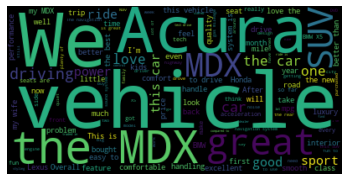

In [385]:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

In [386]:
def make_wordcloud(item):
    
    text = data.Review[item]
    
    wordcloud = WordCloud().generate(text)
    
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.savefig('Wordcloud_{}_{}_{}.png'.format(data.Make[item], data.Model[item], data.Year[item]))

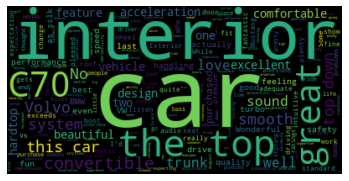

In [387]:
for i in range(0, len(data.Review)):
    make_wordcloud(i)